In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:/Users/jahna/Downloads/anaconda/Fraud.csv')


In [5]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4359273,309,TRANSFER,135171.46,C2022859116,4069.00,0.00,C523725932,0.00,135171.46,0,0
3232939,250,PAYMENT,7810.98,C434712580,292994.61,285183.63,M703601822,0.00,0.00,0,0
2971062,231,CASH_OUT,313666.09,C14049014,0.00,0.00,C1161977653,666677.05,980343.14,0,0
2545052,206,TRANSFER,178975.68,C106845601,793.00,0.00,C1907493872,339714.87,518690.54,0,0
5408763,378,CASH_OUT,156525.60,C1291856945,340.00,0.00,C1706024202,0.00,156525.60,0,0


In [6]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [7]:
data.shape

(6362620, 11)

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 We can see that all columns do not contain any null values. So, we dont need to bother about dealing with missing values 

In [10]:
data.duplicated().sum()


0

In [11]:
data = data.drop(['nameOrig','nameDest'],axis=1)

I am dropping the name of the origin account and destination account since I am very sure that the names can not help in the prediction

In [13]:
data.isFlaggedFraud.sum()

16

In [14]:
data.isFraud.sum()

8213

In [15]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [19]:
num_cols = data.select_dtypes(['int','float']) 
correlation_matrix = num_cols.corr()*100
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,100.000000,2.237299,-1.005838,-1.029904,2.766536,2.588818,3.157757,0.327742
amount,2.237299,100.000000,-0.276247,-0.786093,29.413745,45.930427,7.668843,1.229460
oldbalanceOrg,-1.005838,-0.276247,100.000000,99.880276,6.624250,4.202862,1.015442,0.383453
newbalanceOrig,-1.029904,-0.786093,99.880276,100.000000,6.781152,4.183750,-0.814816,0.377606
oldbalanceDest,2.766536,29.413745,6.624250,6.781152,100.000000,97.656851,-0.588528,-0.051350
newbalanceDest,2.588818,45.930427,4.202862,4.183750,97.656851,100.000000,0.053535,-0.052872
isFraud,3.157757,7.668843,1.015442,-0.814816,-0.588528,0.053535,100.000000,4.410920
isFlaggedFraud,0.327742,1.229460,0.383453,0.377606,-0.051350,-0.052872,4.410920,100.000000


 isFraud is our target variable, it seems like none of the columns have strong correlation with the target variable

### EDA



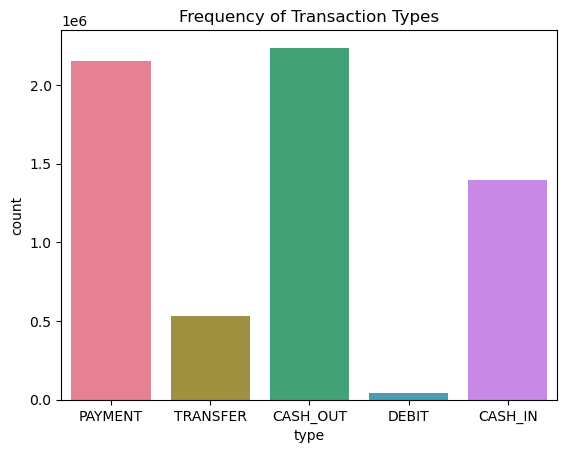

In [22]:
sns.countplot(x='type', data=data, hue='type', palette="husl", legend=False)
plt.title('Frequency of Transaction Types')
plt.show()

There are very less number of Debit types compared to cashout and payments

Highest number of transaction types are cashout and payments

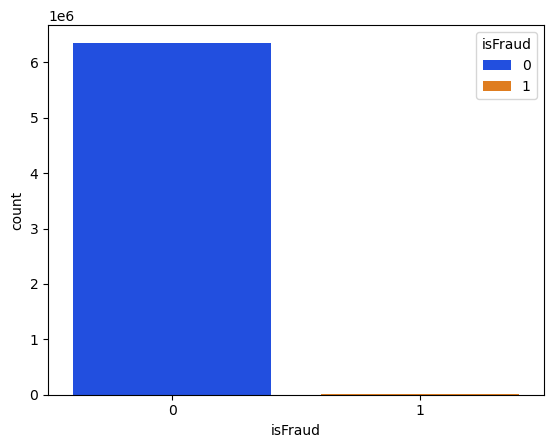

In [24]:
sns.countplot(x='isFraud', data=data,hue='isFraud', palette="bright", legend=True)
plt.show()


There are very less fraud cases.
From which we can conclude that data is skewed.

In [26]:
ct = pd.crosstab(data['type'], data['isFraud'])
ct

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


##### 1. There are no fraudulent transactions from CASH_IN; DEBIT; PAYMENT type.
##### 2. All the fraudulent transactions are from CASH_OUT and TRANSFER type.
##### 3. Higher % of TRANSFER type are fraudulent when compared to CASH_OUT type.

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

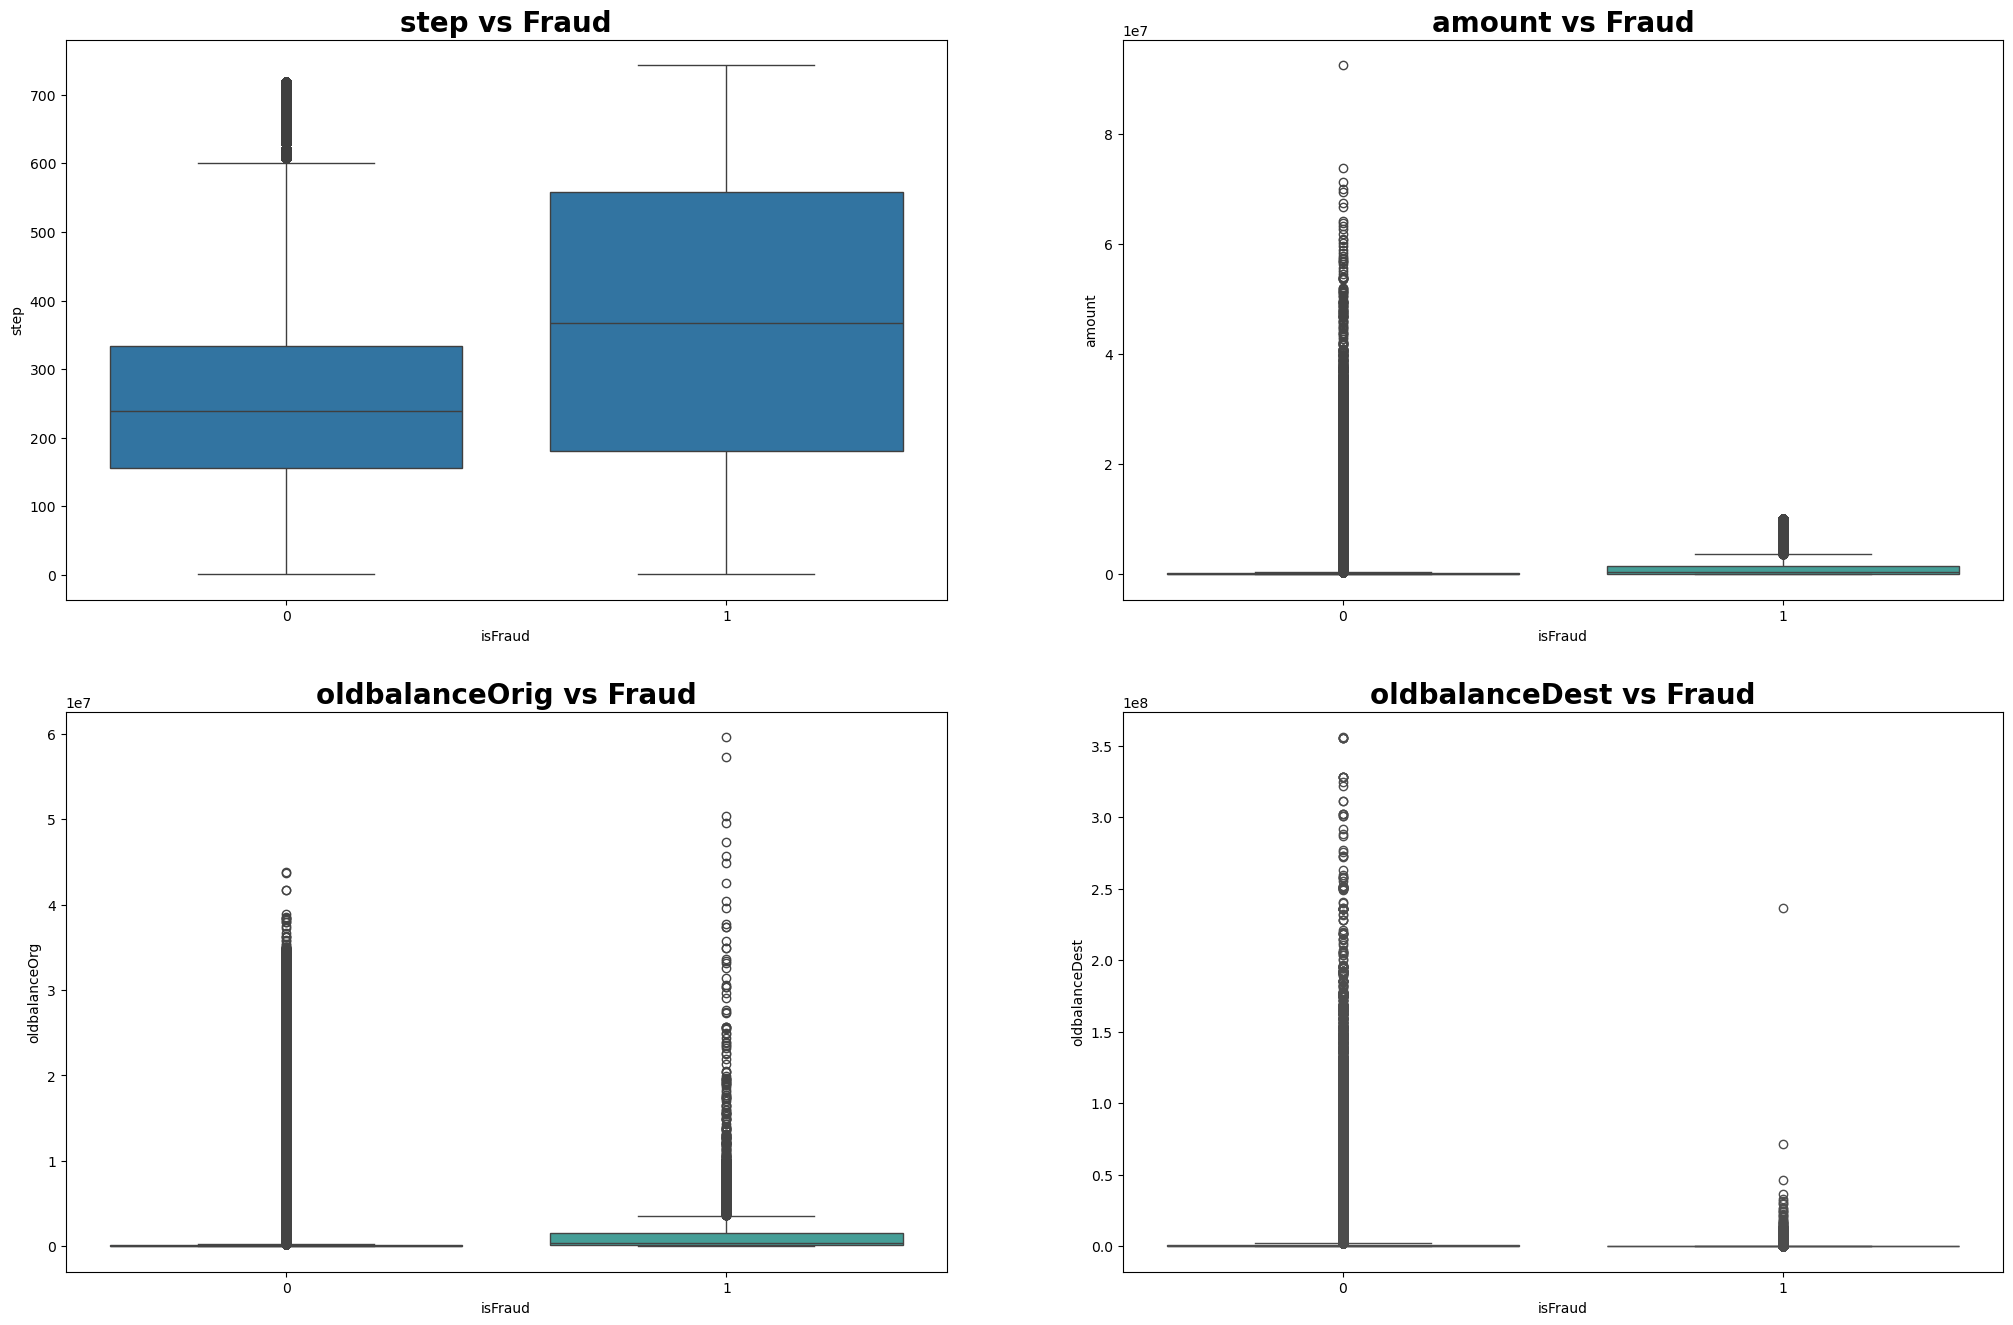

In [28]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data )
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data, hue='isFraud', palette="husl", legend=False)
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data, hue='isFraud', palette="husl", legend=False)
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data, hue='isFraud', palette="bright", legend=False)
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

##### 1. Distribution of steps does not vary between fraud and non fraud transactions.
##### 2. Amounts are comparitively lower and concentrated in smaller range when compared to ampunt in non-fraudulent transactions
##### 3. Fraudulent cases appear during small transaction amounts.
##### 4. fraudulent cases occur when the origin old balance is lower, but there are many outliers to it. 
##### 5. Fraudulent transactions tend to involve lower destination balances, with some exceptions where large outliers exist.

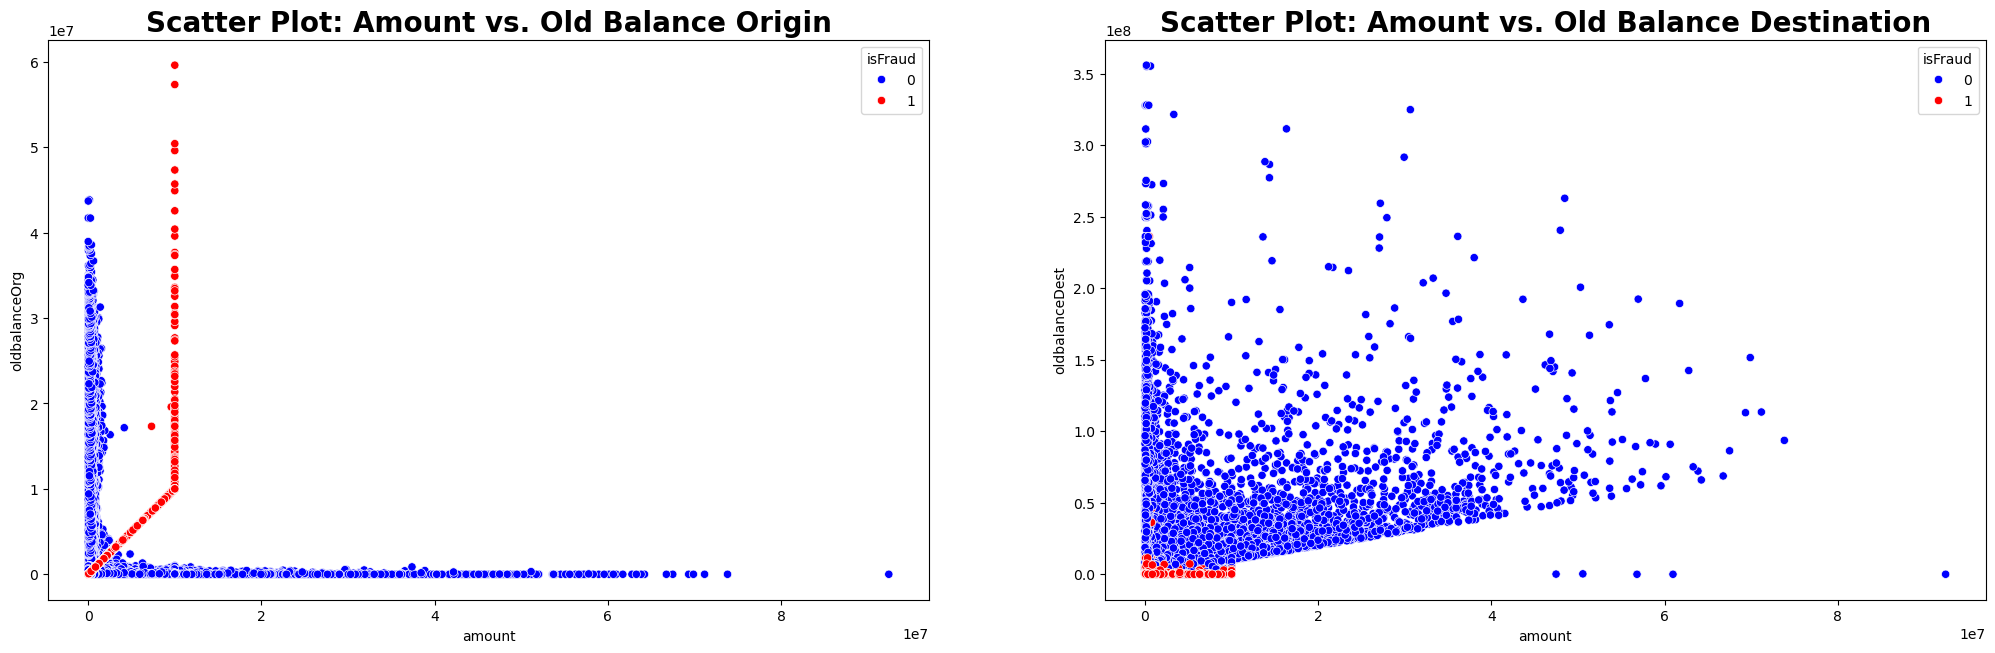

In [234]:
plt.figure(figsize=(25, 16))

# Scatter plot 1: Amount vs. Old Balance Origin
plt.subplot(2, 2, 1)
sns.scatterplot(x='amount', y='oldbalanceOrg', data=data, hue='isFraud', palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot: Amount vs. Old Balance Origin', fontweight="bold", size=20)

# Scatter plot 2: Amount vs. Old Balance Destination
plt.subplot(2, 2, 2)
sns.scatterplot(x='amount', y='oldbalanceDest', data=data, hue='isFraud', palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot: Amount vs. Old Balance Destination', fontweight="bold", size=20)

plt.show()


### Model:

1. Since the data is skewed, I want to sample in such a way that I get comparable no.of samples from both fraudulent and non-fraudulent cases
2. Since non-fraud cases are only from CASH_OUT and TRANSFER type, I have chosen a sort of stratified sampling where I sample all the fraud cases and 30,000 non-fraud cases.
3. I sample 10,000 of the non-fraud cases from CASHOUT; TRANSFER type and 20,000 from remaining. 
4. I want to provide this sample data to logistic regression model. 

#### What features am I using?

1. I have decided to drop step column since the distribution is not varying between fraud and non-fraud.
2. I am keeping all other features since I can see some patterns in scatter plots and also from basic domain knowledge I guess that these features are gonna help in the prediction.

In [32]:

# Separate fraud and non-fraud data
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]


In [33]:
non_fraud_cashout_transfer = non_fraud_data[non_fraud_data['type'].isin(['CASH_OUT','TRANSFER'])]
non_fraud_other = non_fraud_data[~non_fraud_data['type'].isin(['CASH_OUT','TRANSFER'])]

In [89]:
non_fraud_15000 = non_fraud_other.sample(n=15000,random_state=42)
non_fraud_10000 = non_fraud_cashout_transfer.sample(n=10000,random_state=42)

In [95]:
non_fraud_sample = pd.concat([non_fraud_10000,non_fraud_15000])
non_fraud_sample.shape

(25000, 9)

In [97]:
fraud_sample = fraud_data

In [99]:
final_sample = pd.concat([fraud_sample,non_fraud_sample])

In [101]:
# Shuffling
final_sample = final_sample.sample(frac=1, random_state=42).reset_index(drop=True)


In [103]:
df = final_sample

In [105]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler

In [203]:
y = df['isFraud']
X = df.drop(['isFraud','step'],axis=1)


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26570, 7)
(26570,)
(6643, 7)
(6643,)


In [209]:
# standardizing data
sc = StandardScaler()
model=sc.fit(X)
X= model.transform(X)

In [211]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [213]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predicted class labels
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred))

In [215]:
print("Logistic Regression Results:")
evaluate_model(log_reg, X_test, y_test)

Logistic Regression Results:
Confusion Matrix:
[[4912   95]
 [ 361 1275]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5007
           1       0.93      0.78      0.85      1636

    accuracy                           0.93      6643
   macro avg       0.93      0.88      0.90      6643
weighted avg       0.93      0.93      0.93      6643

Accuracy: 0.9313563149179588


#### Recall is very necessary in fraud detection.
#### It doesn't seem to be very satisfactory,let's increase the performance!!


### Trying SMOTE technique

In [187]:
#importing SMOTE
from imblearn.over_sampling import SMOTE


In [189]:
data.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
37749,9,3,10326.40,0.0,0.0,0.00,0.00,0,0
700937,37,1,205268.01,108374.0,0.0,8946.22,408457.28,0,0
111743,11,1,497409.46,5501.0,0.0,3485791.09,3918636.11,0,0
5326079,374,1,46414.01,191.0,0.0,119193.29,165607.30,0,0
5895547,403,3,14969.78,10147.0,0.0,0.00,0.00,0,0


In [191]:
df1 = data

In [193]:
# encoding categorical data
le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])

In [223]:
# features and target
X = df1.drop(['isFraud','step'], axis=1)  # Features
y = df1['isFraud']                # Target variable (1 for fraud, 0 for non-fraud)


In [225]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')  # Adjust sampling_strategy as needed

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution
print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())


Original dataset shape: isFraud
0    6354407
1       8213
Name: count, dtype: int64
Resampled dataset shape: isFraud
0    6354407
1    6354407
Name: count, dtype: int64


In [226]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1213944   56893]
 [ 142674 1128252]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92   1270837
           1       0.95      0.89      0.92   1270926

    accuracy                           0.92   2541763
   macro avg       0.92      0.92      0.92   2541763
weighted avg       0.92      0.92      0.92   2541763



## Summary of key findings:



### Key factors for prediction:

#### 1.Transaction type: 
Fraud is mostly found associated with CASH_OUT and TRANSFER types.
#### 2.Transaction amount and original old balance:
Fraudulent transactions occur typically when the original balance of the sender is high and the amount is relatively small. This suggests that fraud tends to happen more often when the sender has a significant balance and small amounts are being transferred.
#### 3.Transaction amount and destination old balance:
Fraudulent transactions tend to cluster near lower amounts and original reciever's balances, indicating that many fraudulent transfers are    directed to accounts with smaller balances.

### Preventive measures:

1. Securing data pipelines to prevent unauthorized access.
3. Upadating models along with data and maintaining all the versions of data and models.
4. Tracking the performance continuosly

We can ensure if all of this is working by collecting feedback from the end user 